<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/vibration/assignments/Assignment_on_vibration_of_coupled_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Systems - Introduction to Vibratory Systems - Assignment #2: Introduction to Dynamic Systems

* This is Assignment#1 on Dynamic Systems. It is intended to give you some experience on representing motion in moving (non Inertial) frames.

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to 
'E90512_Assignment#1_DynamicSystems.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk

# Setting Up Python

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

# Q1#1: First Approximation of Simple Vibratory System


Consider the blower shown in figure below and answer the following:

1. Explain the source of vibration arising in the blower using schematics and mathematical justification and state the relationship between the vibrational frequency of the blower and the rotational speed of the blower. 

2. We are interested in predicting its small amplitudte motion under various conditions. Show that for small amplitude motion the system response is approximated by the solutions of the linear second order ODE of the form

\begin{align}
M\ddot{x}+C\dot{x}+Kx=F(t)
\end{align}

3. What can you say about the response of the system to a sudden initial vertical displacement that may have been caused by some accidental event.

4. What can you say about the amplitude of vibrations for 

* extremely high rotational speeds of the blower? Justify your answer clearly.

* extremely low rotational speeds of the blower? Justify your answer clearly.

5. Plot the amplitude of vibration of the blower versus the rotational speed of the blower?

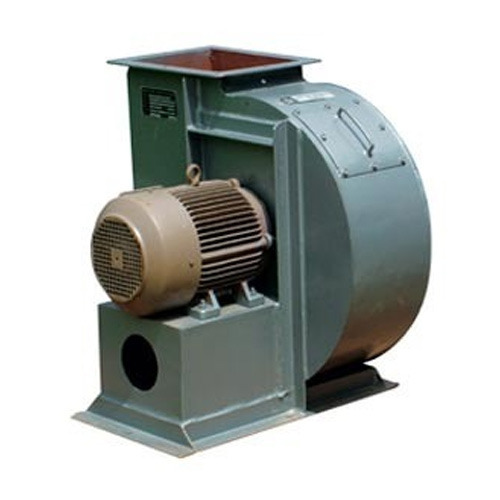



# Q#2: Example of a 2-DOF Coupled Spring Mass Damper System

Consider the vibration of a coupled spring mass damper system that can be approximated by a system of the form: 

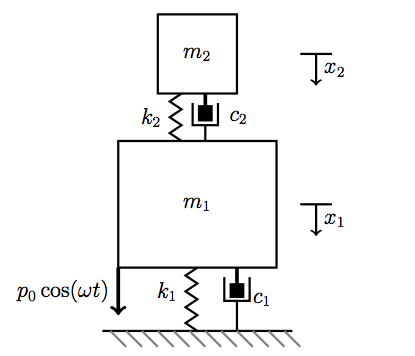



## Q2.1-Lumped Parameter Model of 2-DOF Spring Mass Damper System

### Q2.1.1 Show that the system can be written down as a second order linear matrix differential equation of the form,
\begin{align}
M\ddot{X}+C\dot{X}+KX=F(t).
\end{align}

### Q2.1.2 Find the dynamic system form of the equations 
\begin{align}
\dot{Y}= AY+B\,f(t).
\end{align}

## Q2.2-Modal Analysis

Consider the case where the damping is very low and the forcing is sinusoidal. That is, consider situations that are very close to the case where $C\approx 0_{2\times 2}$ and $f(t)=f_0\cos{\omega t}$

Let
\begin{align}
\omega_{n1}^2=\frac{k_1}{m_1},\:\:\:\omega_{n2}^2=\frac{k_2}{m_2},
\:\:\:\mu=\frac{m_2}{m_1},\:\:\:\alpha=\frac{\omega_{n_2}^2}{\omega_{n_1}^2}
\end{align}
and answer the following:

### Q2.2.1 Sinusoidal Response
Show that

\begin{align*}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix} &\approx \gamma_1f_0\,\chi_1(\omega)\cos{(\omega t +\phi_1(\omega))}{\bar{X}_{m_1}}+\gamma_2f_0\,\chi_2(\omega)\cos{(\omega t +\phi_2(\omega))}{\bar{X}_{m_2}}.
\end{align*} 
where
\begin{align*}
\chi_i(\omega)&=\left|\frac{1/m_1}{-\omega^2+\omega^2_i}\right|,\\
\phi_i(\omega)&={\large\angle}\frac{1}{-\omega^2+\omega^2_i},
\end{align*}
\begin{align}
\omega_{1}^2&=\frac{\omega_{n1}^{2} \left(\alpha \mu + \alpha + 1\right)}{2} - \frac{\omega_{n1}^{2} \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1}}{2}=\frac{\omega_{n1}^{2}}{2}\left( \left(\alpha \mu + \alpha + 1\right)-\sqrt{\left(\alpha \mu + \alpha + 1\right)^2-4\alpha}\right)\\
\omega_{2}^2&=\frac{\omega_{n1}^{2} \left(\alpha \mu + \alpha + 1\right)}{2} + \frac{\omega_{n1}^{2} \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1}}{2}=\frac{\omega_{n1}^{2}}{2}\left( \left(\alpha \mu + \alpha + 1\right)+\sqrt{\left(\alpha \mu + \alpha + 1\right)^2-4\alpha}\right)
\end{align}
\begin{align}
\bar{X}_{m_1}&=
\begin{bmatrix}\frac{2 \alpha \mu}{\alpha \mu - \alpha + \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1} + 1}\\1\end{bmatrix}\\
\bar{X}_{m_2}&=
\begin{bmatrix}\frac{2 \alpha \mu}{\alpha \mu - \alpha - \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1} + 1}\\1\end{bmatrix}
\end{align}

### Q2.2.2-The Frequency Response of the System

Show that
\begin{align}
x(t)&\approx f_0\chi_1(\omega)\cos{\left(\omega t+\phi_1(\omega)\right)}\\
\theta(t)&\approx f_0\chi_2(\omega)\cos{\left(\omega t+\phi_2(\omega)\right)}
\end{align}
where
\begin{align}
\chi_1(\omega)&=\left|G_1(i\omega)\right|,\:\:\:\:\:\phi_1(\omega)=\angle G_1(i\omega)\\
\chi_2(\omega)&=\left|G_2(i\omega)\right|,\:\:\:\:\:\phi_2(\omega)=\angle G_2(i\omega)
\end{align}
with
\begin{align}
G_1(s)&=\frac{(\gamma_1\bar{x}_{11}+\gamma_2\bar{x}_{12})s^2+(\gamma_1\bar{x}_{11}\omega_2^2+\gamma_2\bar{x}_{12}\omega_1^2)}{m_1(s^2+\omega_1^2)(s^2+\omega_2^2)}\\
G_2(s)&=\frac{(\gamma_1\bar{x}_{21}+\gamma_2\bar{x}_{22})s^2+(\gamma_1\bar{x}_{21}\omega_2^2+\gamma_2\bar{x}_{22}\omega_1^2)}{m_1(s^2+\omega_1^2)(s^2+\omega_2^2)}.
\end{align}

##### Q2.2.2.1 Show that

\begin{align}
\chi_1(\omega)&=\frac{1}{m_1}\left|{\frac{\alpha \omega_{n1}^{2} - \omega^{2}}{\alpha \mu \omega^{2} \omega_{n1}^{2} + \alpha \omega^{2} \omega_{n1}^{2} - \alpha \omega_{n1}^{4} - \omega^{4} + \omega^{2} \omega_{n1}^{2}}}\right|,\\
\chi_2(\omega)&=\frac{1}{m_1}\left|{\frac{\alpha \omega_{n1}^{2}}{\alpha \mu \omega^{2} \omega_{n1}^{2} + \alpha \omega^{2} \omega_{n1}^{2} - \alpha \omega_{n1}^{4} - \omega^{4} + \omega^{2} \omega_{n1}^{2}}}\right|
\end{align}

### Q2.2.3-Plot the frequency response of the system for the following parameters


In [ ]:
m_1=1.; m_2=1.; k_1=1.; k_2=1.; c_1=0.1; c_2=0.1;
wn1sq=k_1/m_1;
wn2sq=k_2/m_2;
mu=m_2/m_1;
al=wn2sq/wn1sq